# Model Building

### Data Setup

Load data

In [1]:
import pandas as pd

df_mod = pd.read_csv('./data/preprocessed/df_mod.csv')

df_mod

,Rating,a (Negative),aa (Positive),abac (Positive),ability (Negative),ability (Positive),abode (Positive),abound (Positive),abrasion (Positive),abrasive (Negative),...,yorker (Positive),young (Negative),yuan (Negative),yuck (Positive),yummy (Positive),zipper (Negative),zombie (Positive),zone (Negative),zone (Positive),zoo (Positive)
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Remove words that are not used in at least 1% of reviews

In [2]:
df_mod = df_mod.loc[:, (df_mod.mean() >= 0.01)]

df_mod

,Rating,access (Positive),activity (Positive),amenity (Positive),area (Negative),area (Positive),atmosphere (Positive),bar (Positive),bathroom (Negative),bathroom (Positive),...,view (Negative),view (Positive),visit (Positive),walk (Positive),water (Positive),way (Negative),way (Positive),week (Positive),weekend (Positive),wife (Positive)
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20488,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Only include features that give relevant feedback to hotels

In [5]:
columns_to_remove = [
    'beach (Positive)',
    'bit (Positive)',
    'card (Positive)',
    'complaint (Negative)',
    'couple (Positive)',
    'day (Negative)',
    'day (Positive)',
    'experience (Negative)',
    'experience (Positive)',
    'family (Positive)',
    'friend (Positive)',
    'fun (Positive)',
    'guest (Positive)',
    'ground (Positive)',
    'holiday (Positive)',
    'hotel (Negative)',
    'hotel (Positive)',
    'hour (Positive)',
    'husband (Positive)',
    'job (Positive)',
    'lot (Positive)',
    'minute (Positive)',
    'morning (Positive)',
    'night (Negative)',
    'night (Positive)',
    'person (Positive)',
    'point (Positive)',
    'problem (Negative)',
    'problem (Positive)',
    'review (Negative)',
    'review (Positive)',
    'stay (Positive)',
    'thing (Negative)',
    'thing (Positive)',
    'time (Negative)',
    'time (Positive)',
    'touch (Positive)',
    'towel (Positive)',
    'trip (Positive)',
    'use (Positive)',
    'vacation (Positive)',
    'visit (Positive)',
    'water (Positive)',
    'way (Negative)',
    'way (Positive)',
    'week (Positive)',
    'weekend (Positive)',
    'wife (Positive)',
]

df_mod = df_mod.loc[:, ~df_mod.columns.isin(columns_to_remove)]

df_mod

,Rating,access (Positive),activity (Positive),amenity (Positive),...,value (Positive),view (Negative),view (Positive),walk (Positive)
0,4,0,0,0,...,0,0,0,0
1,2,0,0,0,...,0,0,0,0
2,3,0,0,0,...,0,0,0,0
3,5,0,0,0,...,0,0,0,0
4,5,0,0,0,...,0,0,0,1
...,...,...,...,...,...,...,...,...,...
20486,5,0,0,0,...,0,0,0,0
20487,4,0,0,0,...,0,0,1,0
20488,2,0,0,0,...,0,0,0,0
20489,1,0,0,0,...,0,0,0,0


In [4]:
X = df_mod.drop(columns=['Rating']).to_numpy()
y = df_mod['Rating'].to_numpy()

X.shape, y.shape

((20491, 64), (20491,))

In [5]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

cv_data = []
for train_index, test_index in skf.split(X, y):
    cv_data.append((
        X[train_index],
        X[test_index],
        y[train_index],
        y[test_index],
    ))

len(cv_data)

3

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, Ridge
import numpy as np
import optuna

params_and_results = []
def objective(trial, cv_data=cv_data):
    # model tuning
    alpha = trial.suggest_float('alpha', 0.1, 50, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0, step=0.1)

    # avoid using elastic net with low and high l1_ratios because it can be very slow
    if l1_ratio >= 0.99:
        mod = Lasso(alpha=alpha)
    elif l1_ratio <= 0.01:
        mod = Ridge(alpha=alpha)
    else:
        mod = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test in cv_data:
        y_actuals.append(y_test)

        mod.fit(X_train, y_train)
        y_preds.append(mod.predict(X_test))

    mse = mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds))
    params_and_results.append((alpha, l1_ratio, mse))
    return mse

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=1_000, show_progress_bar=True)

study.best_params

[I 2024-04-10 22:50:11,812] A new study created in memory with name: no-name-879e6ec7-f64f-404e-8eb4-b1a77b7ed59f


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2024-04-10 22:50:11,879] Trial 0 finished with value: 1.5202882763584364 and parameters: {'alpha': 0.3652823914515378, 'l1_ratio': 0.5}. Best is trial 0 with value: 1.5202882763584364.
[I 2024-04-10 22:50:11,949] Trial 1 finished with value: 1.5202882763584364 and parameters: {'alpha': 1.3646445434079961, 'l1_ratio': 0.9}. Best is trial 0 with value: 1.5202882763584364.
[I 2024-04-10 22:50:12,004] Trial 2 finished with value: 1.5199279675014201 and parameters: {'alpha': 0.2897076071660083, 'l1_ratio': 0.30000000000000004}. Best is trial 2 with value: 1.5199279675014201.
[I 2024-04-10 22:50:12,048] Trial 3 finished with value: 1.5202882763584364 and parameters: {'alpha': 0.537229685439696, 'l1_ratio': 0.7000000000000001}. Best is trial 2 with value: 1.5199279675014201.
[I 2024-04-10 22:50:12,093] Trial 4 finished with value: 1.5202882763584364 and parameters: {'alpha': 0.39342792218558437, 'l1_ratio': 0.8}. Best is trial 2 with value: 1.5199279675014201.
[I 2024-04-10 22:50:12,146] T

{'alpha': 13.287956248551765, 'l1_ratio': 0.0}

Fill in table

In [7]:
for l1_ratio in np.arange(0.10, 1.10, 0.20):
    for alpha in np.arange(5, 55, 10):
        if l1_ratio >= 0.99:
            mod = Lasso(alpha=alpha)
        elif l1_ratio <= 0.01:
            mod = Ridge(alpha=alpha)
        else:
            mod = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        y_actuals = []
        y_preds = []
        for X_train, X_test, y_train, y_test in cv_data:
            y_actuals.append(y_test)

            mod.fit(X_train, y_train)
            y_preds.append(mod.predict(X_test))

        mse = mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds))
        params_and_results.append((alpha, l1_ratio, mse))

len(params_and_results)

1025

In [8]:
df_params = pd.DataFrame(
    params_and_results,
    columns=['Alpha', 'L1 Ratio', 'MSE']
)

df_params

,Alpha,L1 Ratio,MSE
0,0.365282,0.5,1.520288
1,1.364645,0.9,1.520288
2,0.289708,0.3,1.519928
3,0.537230,0.7,1.520288
4,0.393428,0.8,1.520288
...,...,...,...
1020,5.000000,0.9,1.520288
1021,15.000000,0.9,1.520288
1022,25.000000,0.9,1.520288
1023,35.000000,0.9,1.520288


In [9]:
df_params['Alpha Binned'] = pd.cut(
        df_params['Alpha'],
        bins=[0, 10, 20, 30, 40, 50],
        include_lowest=True,
)

df_params['L1 Ratio Binned'] = pd.cut(
        df_params['L1 Ratio'],
        bins=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
        include_lowest=True,
)

df_params

,Alpha,L1 Ratio,MSE,Alpha Binned,L1 Ratio Binned
0,0.365282,0.5,1.520288,"(-0.001, 10.0]","(0.4, 0.6]"
1,1.364645,0.9,1.520288,"(-0.001, 10.0]","(0.8, 1.0]"
2,0.289708,0.3,1.519928,"(-0.001, 10.0]","(0.2, 0.4]"
3,0.537230,0.7,1.520288,"(-0.001, 10.0]","(0.6, 0.8]"
4,0.393428,0.8,1.520288,"(-0.001, 10.0]","(0.6, 0.8]"
...,...,...,...,...,...
1020,5.000000,0.9,1.520288,"(-0.001, 10.0]","(0.8, 1.0]"
1021,15.000000,0.9,1.520288,"(10.0, 20.0]","(0.8, 1.0]"
1022,25.000000,0.9,1.520288,"(20.0, 30.0]","(0.8, 1.0]"
1023,35.000000,0.9,1.520288,"(30.0, 40.0]","(0.8, 1.0]"


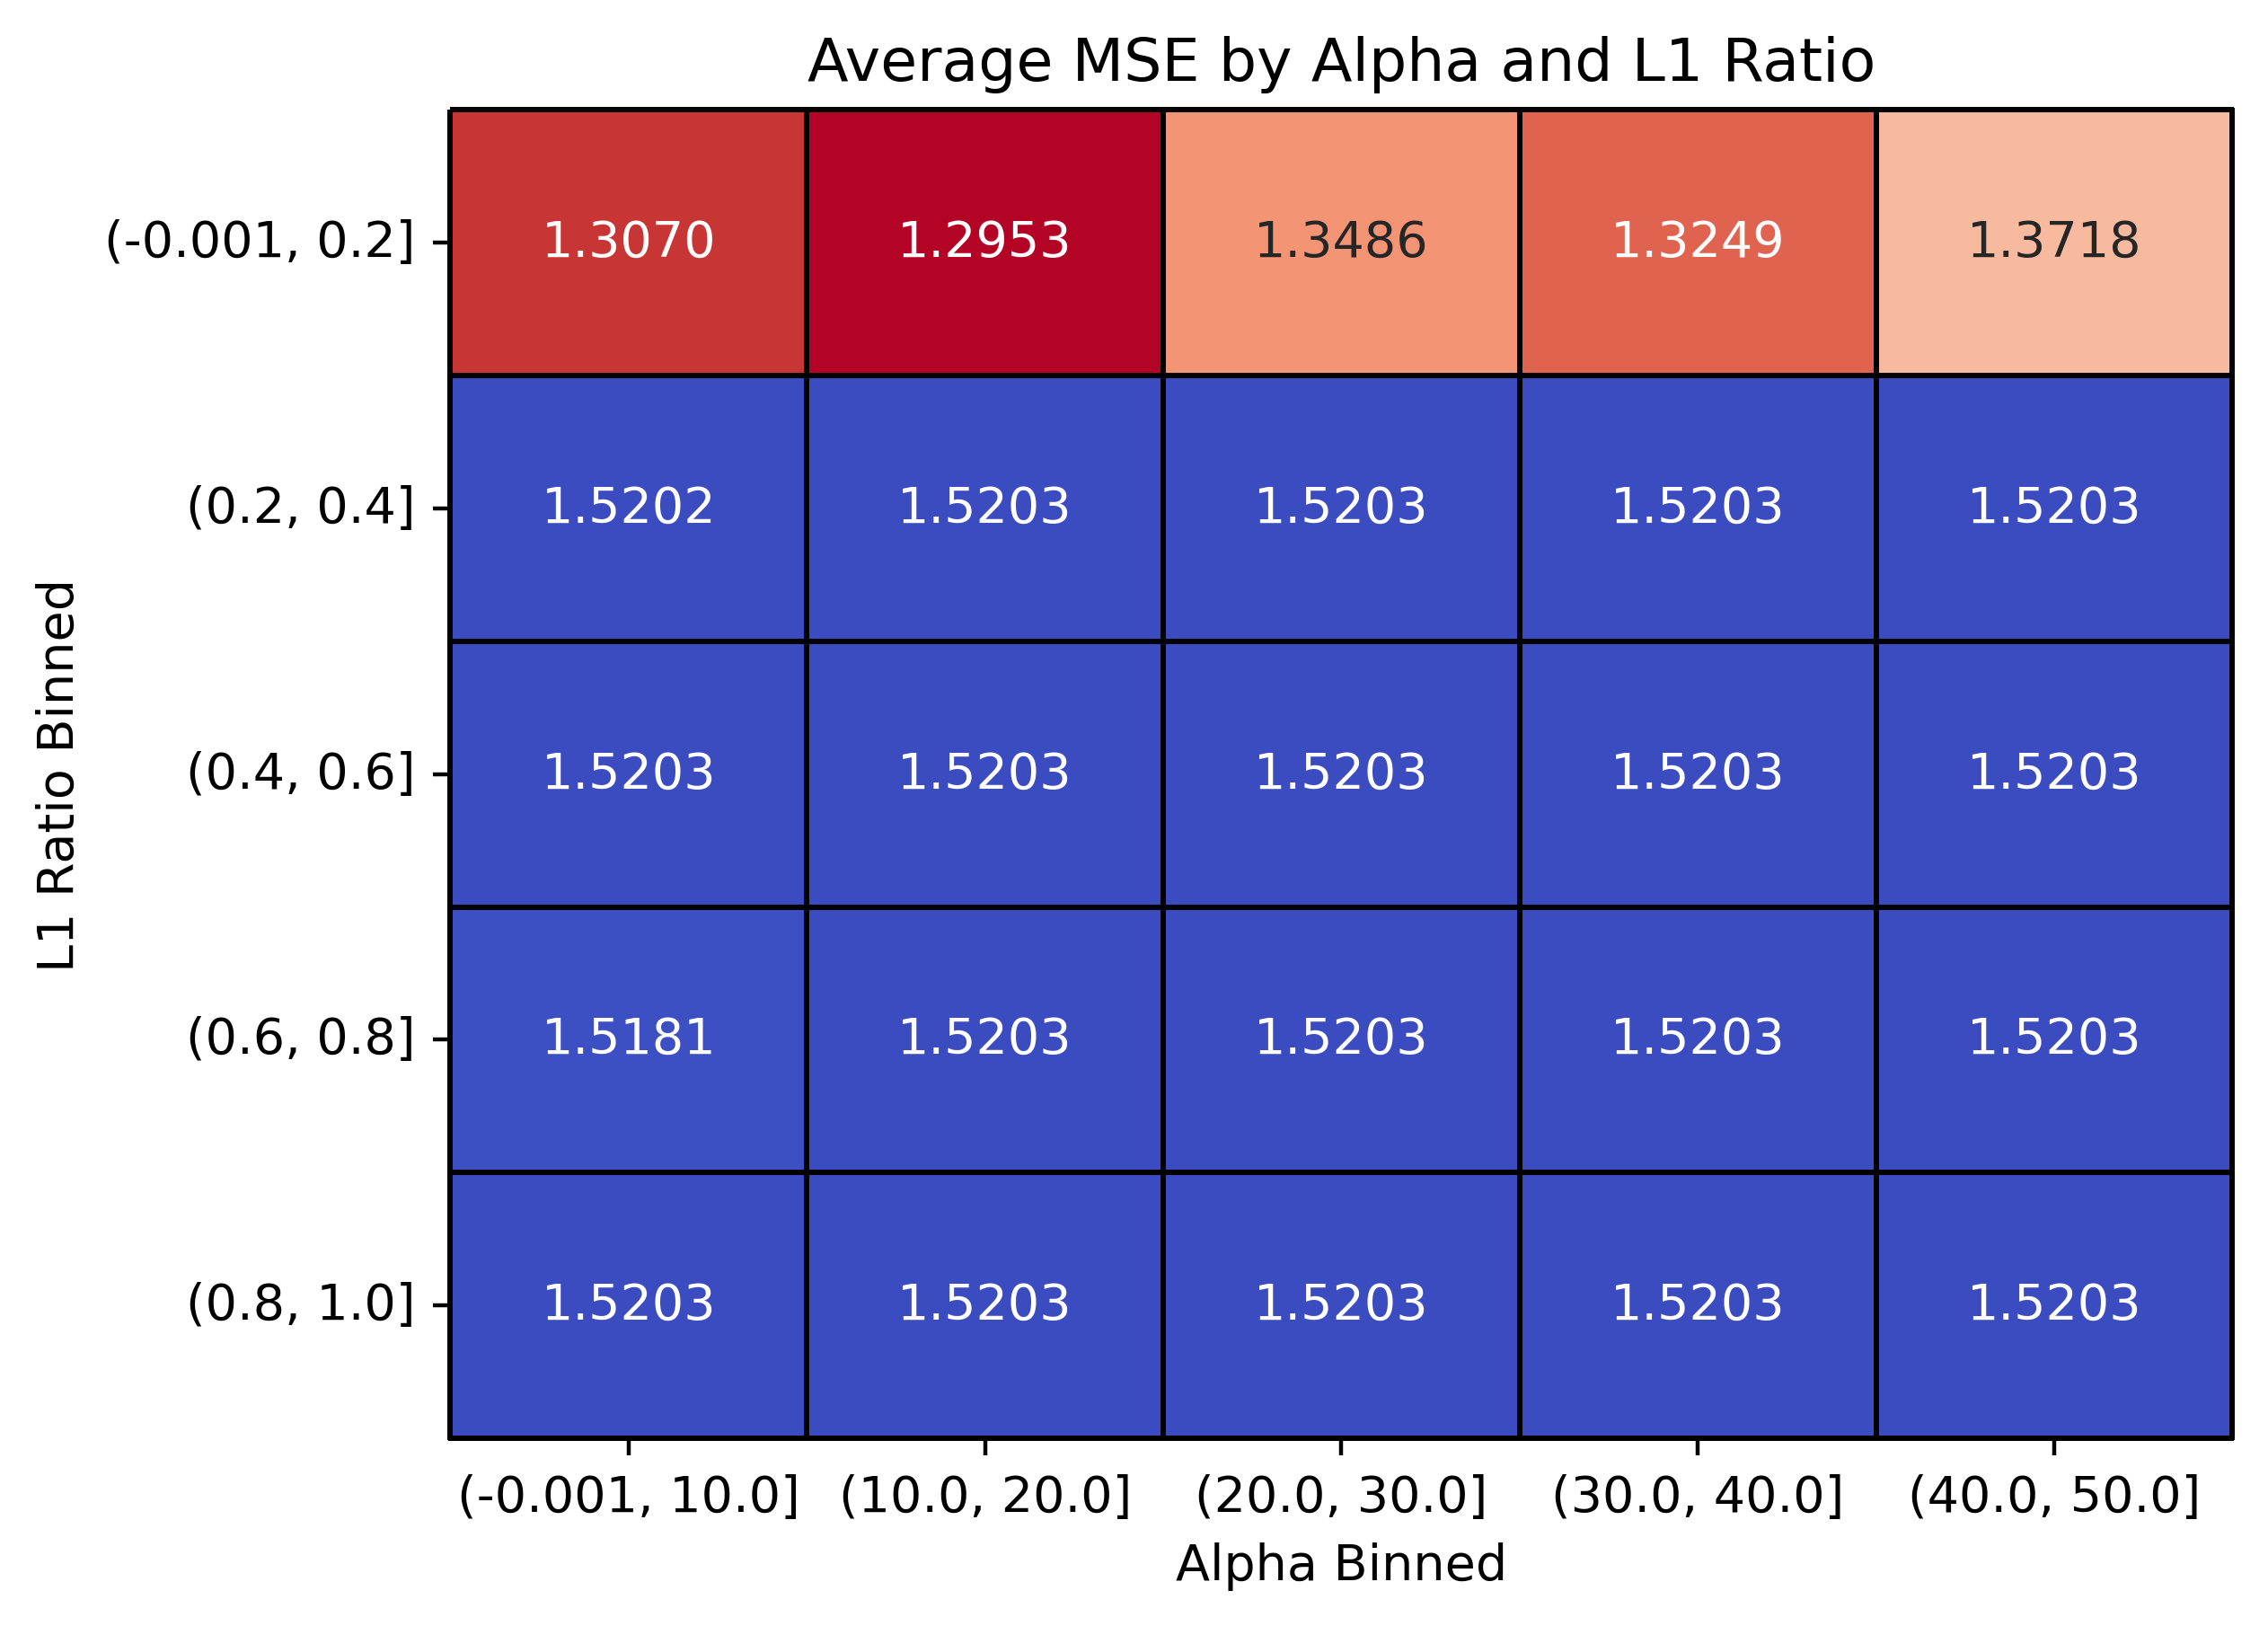

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=400)

df_gridsearch = (
    df_params
    .groupby(['Alpha Binned', 'L1 Ratio Binned'])['MSE']
    .mean()
    .reset_index()
    .sort_values(by=['Alpha Binned', 'L1 Ratio Binned'])
    .pivot(index='L1 Ratio Binned', columns='Alpha Binned', values='MSE')
)

sns.heatmap(df_gridsearch, annot=True, fmt='.4f', cmap='coolwarm_r', cbar=False, 
            linewidths=1, linecolor='black', clip_on=False)

plt.title('Average MSE by Alpha and L1 Ratio')

plt.show()

In [12]:
alpha = study.best_params['alpha']
l1_ratio = study.best_params['l1_ratio']

if l1_ratio >= 0.99:
    mod = Lasso(alpha=alpha)
elif l1_ratio <= 0.01:
    mod = Ridge(alpha=alpha)
else:
    mod = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

mod

Ridge(alpha=13.287956248551765)

In [13]:
mod.fit(X, y)

mod.coef_

array([ 1.57218865e-01,  2.23457162e-01,  1.73153955e-01, -3.78530488e-01,
        8.65452734e-02,  2.87048069e-01,  1.41879307e-01, -6.81340044e-01,
        2.04188052e-01, -7.61568771e-01,  2.10858078e-01,  1.67093514e-01,
        2.75055426e-02,  3.35324958e-02,  1.86097352e-01,  2.96039131e-01,
        1.08907014e-01,  1.20529874e-01,  1.47551097e-02,  3.99353639e-02,
        2.13368149e-01,  1.84752057e-01,  7.78462913e-02,  8.61312901e-02,
        8.68037357e-02, -6.81156161e-01,  1.31919173e-01,  1.08213011e-01,
        2.10133802e-01,  8.87202553e-02,  1.96617725e-01,  1.17599254e-01,
        2.10429948e-02, -3.52295345e-02, -3.38350931e-01,  1.30465430e-01,
       -8.10897048e-01,  2.27058347e-01,  5.71633415e-02, -2.69640185e-01,
        2.33997456e-02,  6.43241763e-02,  4.39682842e-02, -3.70480826e-01,
        1.31403764e-01, -4.46374286e-01,  2.26662437e-01, -8.27609304e-01,
        8.97067790e-02,  2.30096535e-01, -1.05087669e+00,  2.07569621e-01,
        6.45391228e-04,  

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_actuals = []
y_preds = []
for X_train, X_test, y_train, y_test in cv_data:
    y_actuals.append(y_test)

    mod.fit(X_train, y_train)
    y_preds.append(mod.predict(X_test))


y_t = np.hstack(y_actuals)
y_pred = np.hstack(y_preds)

print(
    f"MAE  : {mean_absolute_error(y_t, y_pred):.2f}\n"
    f"RMSE : {mean_squared_error(y_t, y_pred, squared=False):.2f}\n"
    f"MSE  : {mean_squared_error(y_t, y_pred, squared=True):.2f}"
)

MAE  : 0.90
RMSE : 1.12
MSE  : 1.26


In [15]:
pd.Series(y_pred).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    20491.000000
mean         3.948750
std          0.511398
min          0.092470
1%           2.210055
5%           2.964675
10%          3.237694
25%          3.758726
50%          4.005985
75%          4.253468
90%          4.491417
95%          4.638014
99%          4.972710
max          5.977073
dtype: float64

In [16]:
(pd.Series(y_pred) > 5.0).mean()

0.00902835391147333

### Feature Analysis

In [17]:
df_features = pd.DataFrame(
    {
        'Feature': df_mod.drop(columns=['Rating']).columns,
        'Value': mod.coef_,
    },
).sort_values(by=['Value'], ascending=False, ignore_index=True)

df_features.insert(1, 'Sentiment', None)

df_features.loc[df_features['Feature'].str.contains(' (Positive)', regex=False), 'Sentiment'] = 'Positive'
df_features.loc[df_features['Feature'].str.contains(' (Negative)', regex=False), 'Sentiment'] = 'Negative'

df_features['Feature'] = df_features['Feature'].str.replace(' (Positive)', '', regex=False).str.replace(' (Negative)', '', regex=False)

df_features

,Feature,Sentiment,Value
0,atmosphere,Positive,0.374507
1,suite,Positive,0.340090
2,staff,Positive,0.336573
3,city,Positive,0.301524
4,selection,Positive,0.271694
...,...,...,...
59,room,Negative,-0.773611
60,bed,Negative,-0.779599
61,place,Negative,-0.803717
62,staff,Negative,-0.845783


In [18]:
df_features.head(25)

,Feature,Sentiment,Value
0,atmosphere,Positive,0.374507
1,suite,Positive,0.340090
2,staff,Positive,0.336573
3,city,Positive,0.301524
4,selection,Positive,0.271694
5,walk,Positive,0.262467
6,dinner,Positive,0.249069
7,view,Positive,0.244746
8,size,Positive,0.239835
9,place,Positive,0.233221


In [19]:
df_features.tail(25).iloc[::-1].reset_index(drop=True)

,Feature,Sentiment,Value
0,service,Negative,-1.039841
1,staff,Negative,-0.845783
2,place,Negative,-0.803717
3,bed,Negative,-0.779599
4,room,Negative,-0.773611
5,bathroom,Negative,-0.666293
6,food,Negative,-0.655221
7,restaurant,Negative,-0.470612
8,area,Negative,-0.332194
9,resort,Negative,-0.303467


In [20]:
df_features.loc[df_features['Sentiment'] == 'Positive', :].reset_index(drop=True)

,Feature,Sentiment,Value
0,atmosphere,Positive,0.374507
1,suite,Positive,0.340090
2,staff,Positive,0.336573
3,city,Positive,0.301524
4,selection,Positive,0.271694
5,walk,Positive,0.262467
6,dinner,Positive,0.249069
7,view,Positive,0.244746
8,size,Positive,0.239835
9,place,Positive,0.233221


In [21]:
df_features.loc[df_features['Sentiment'] == 'Negative', :].iloc[::-1].reset_index(drop=True)

,Feature,Sentiment,Value
0,service,Negative,-1.039841
1,staff,Negative,-0.845783
2,place,Negative,-0.803717
3,bed,Negative,-0.779599
4,room,Negative,-0.773611
5,bathroom,Negative,-0.666293
6,food,Negative,-0.655221
7,restaurant,Negative,-0.470612
8,area,Negative,-0.332194
9,resort,Negative,-0.303467


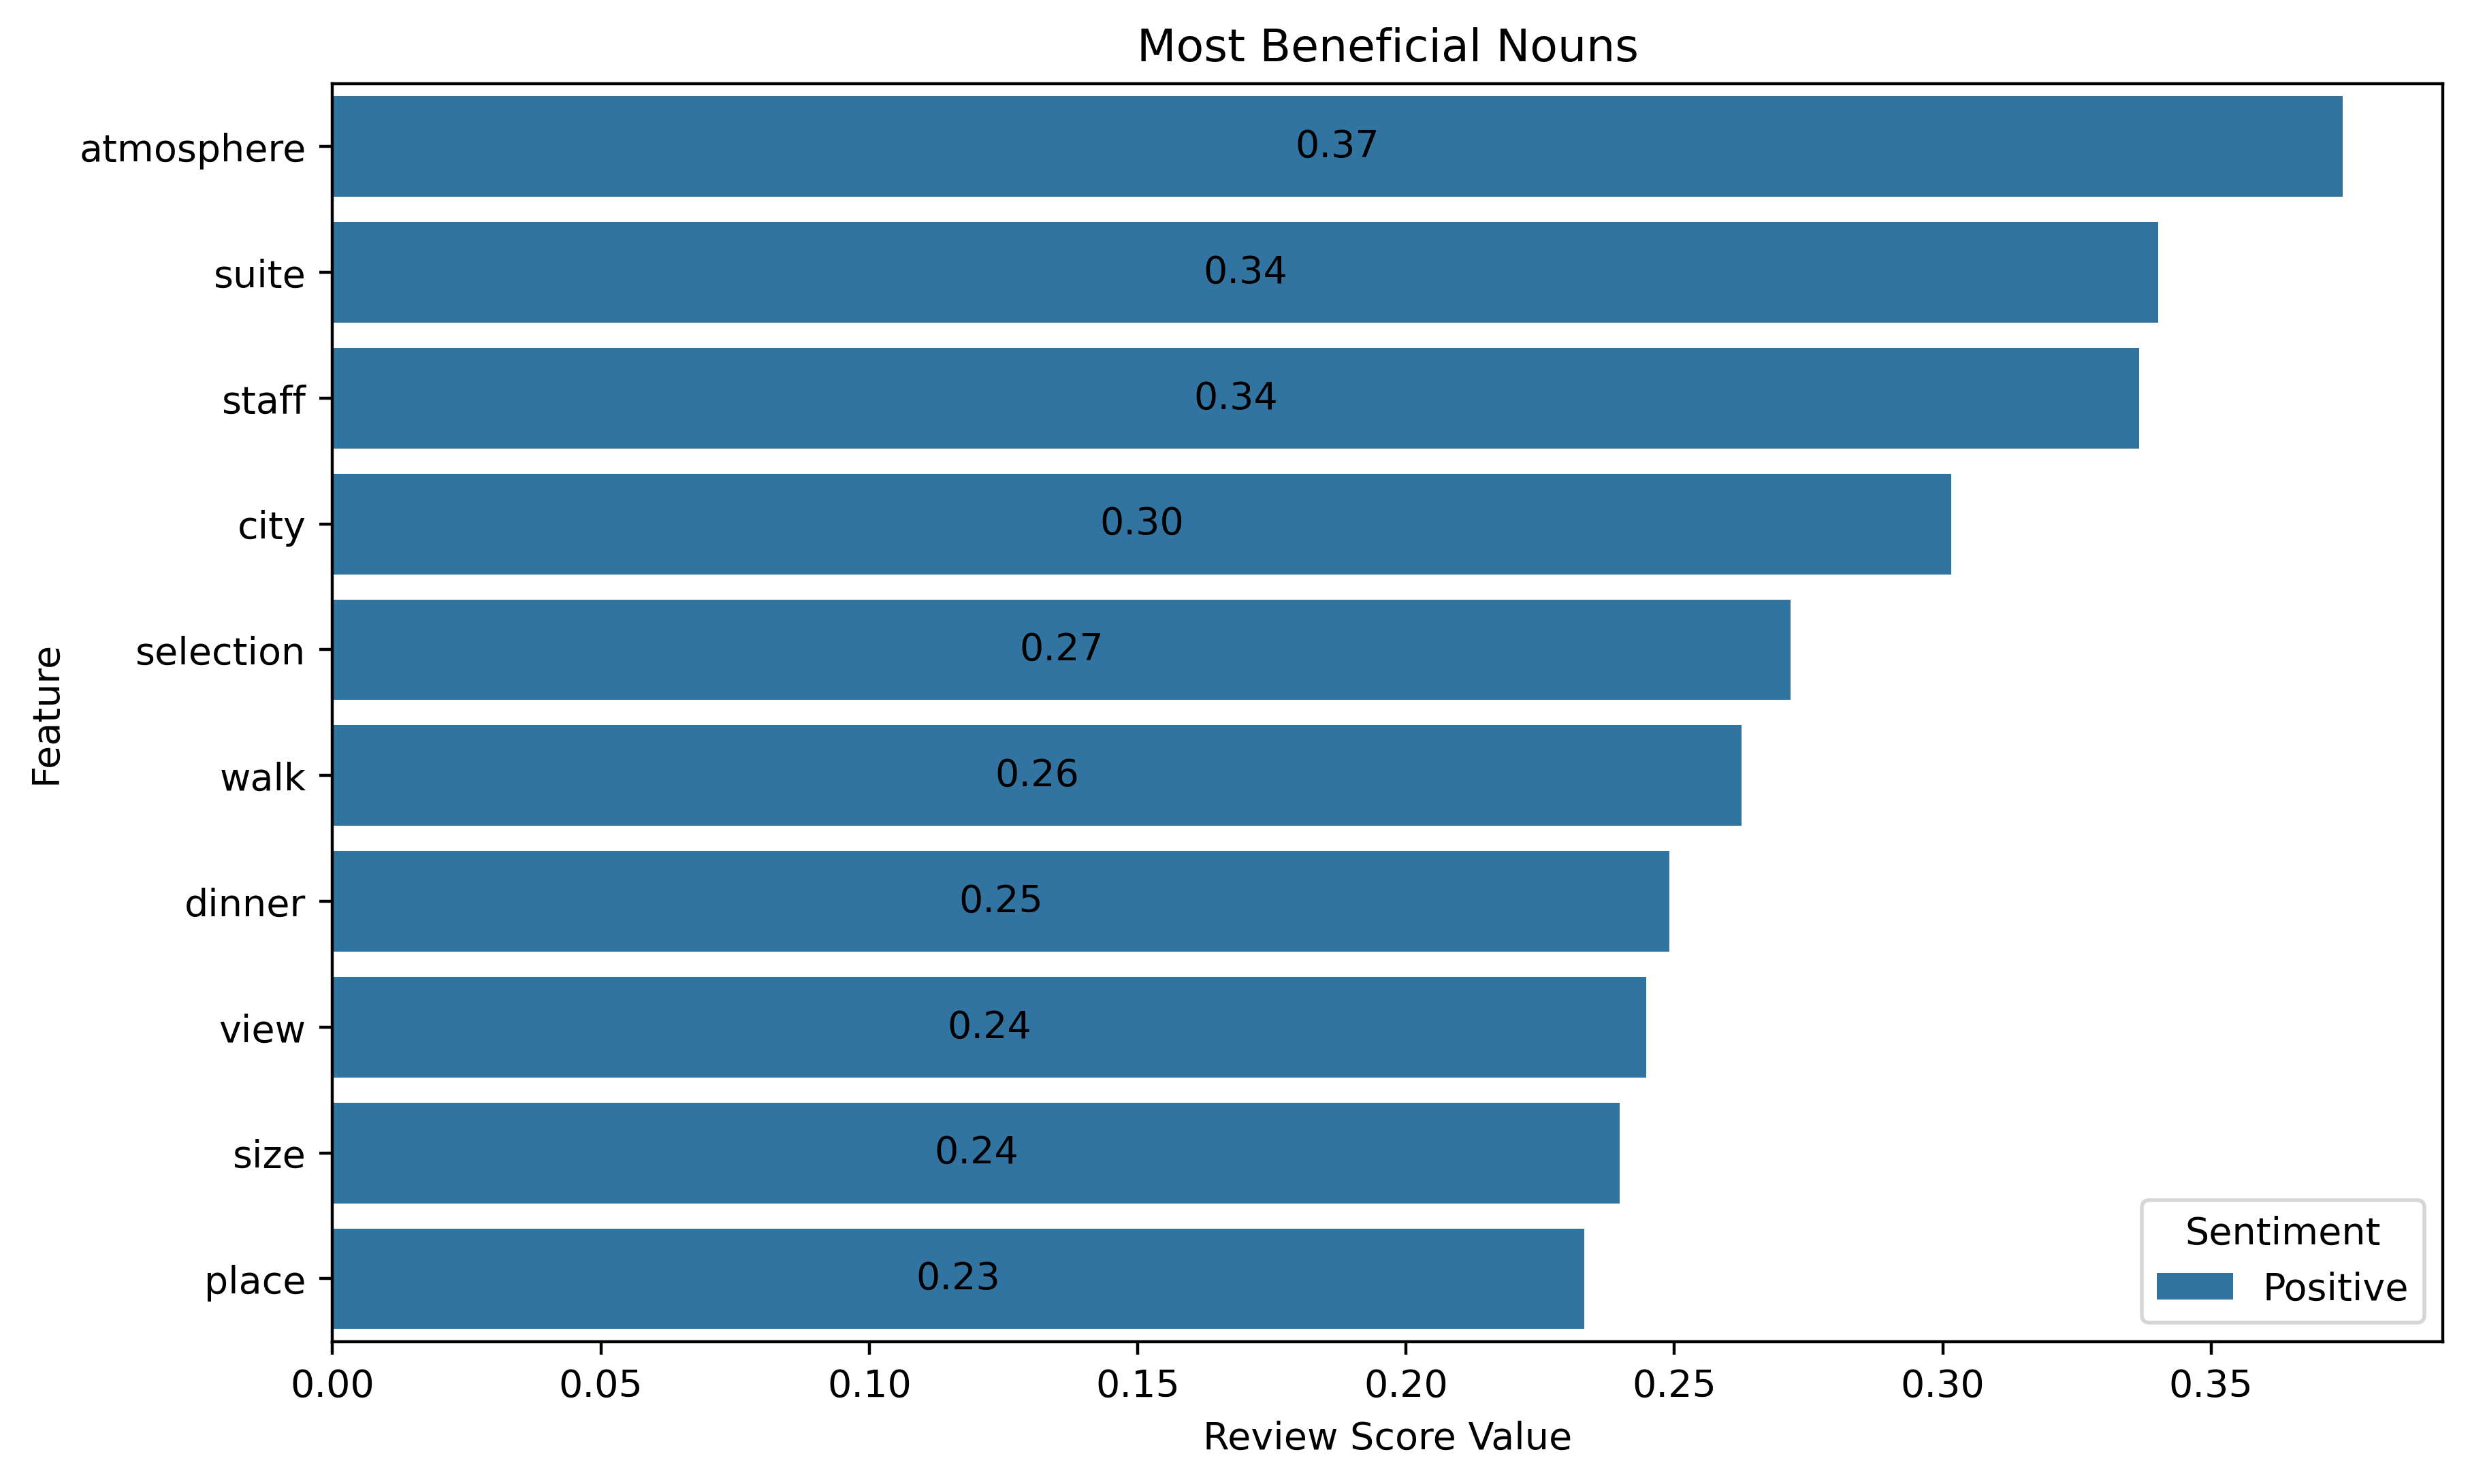

In [34]:
plt.figure(figsize=(10, 6), dpi=400)

ax = sns.barplot(data=df_features.head(10), x='Value', y='Feature', hue='Sentiment', dodge=False)
sns.move_legend(ax, 'lower right')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='center')

plt.title('Most Beneficial Nouns')
plt.xlabel('Review Score Value')

plt.show()

In [23]:
sns.color_palette()[1:2]

[(1.0, 0.4980392156862745, 0.054901960784313725)]

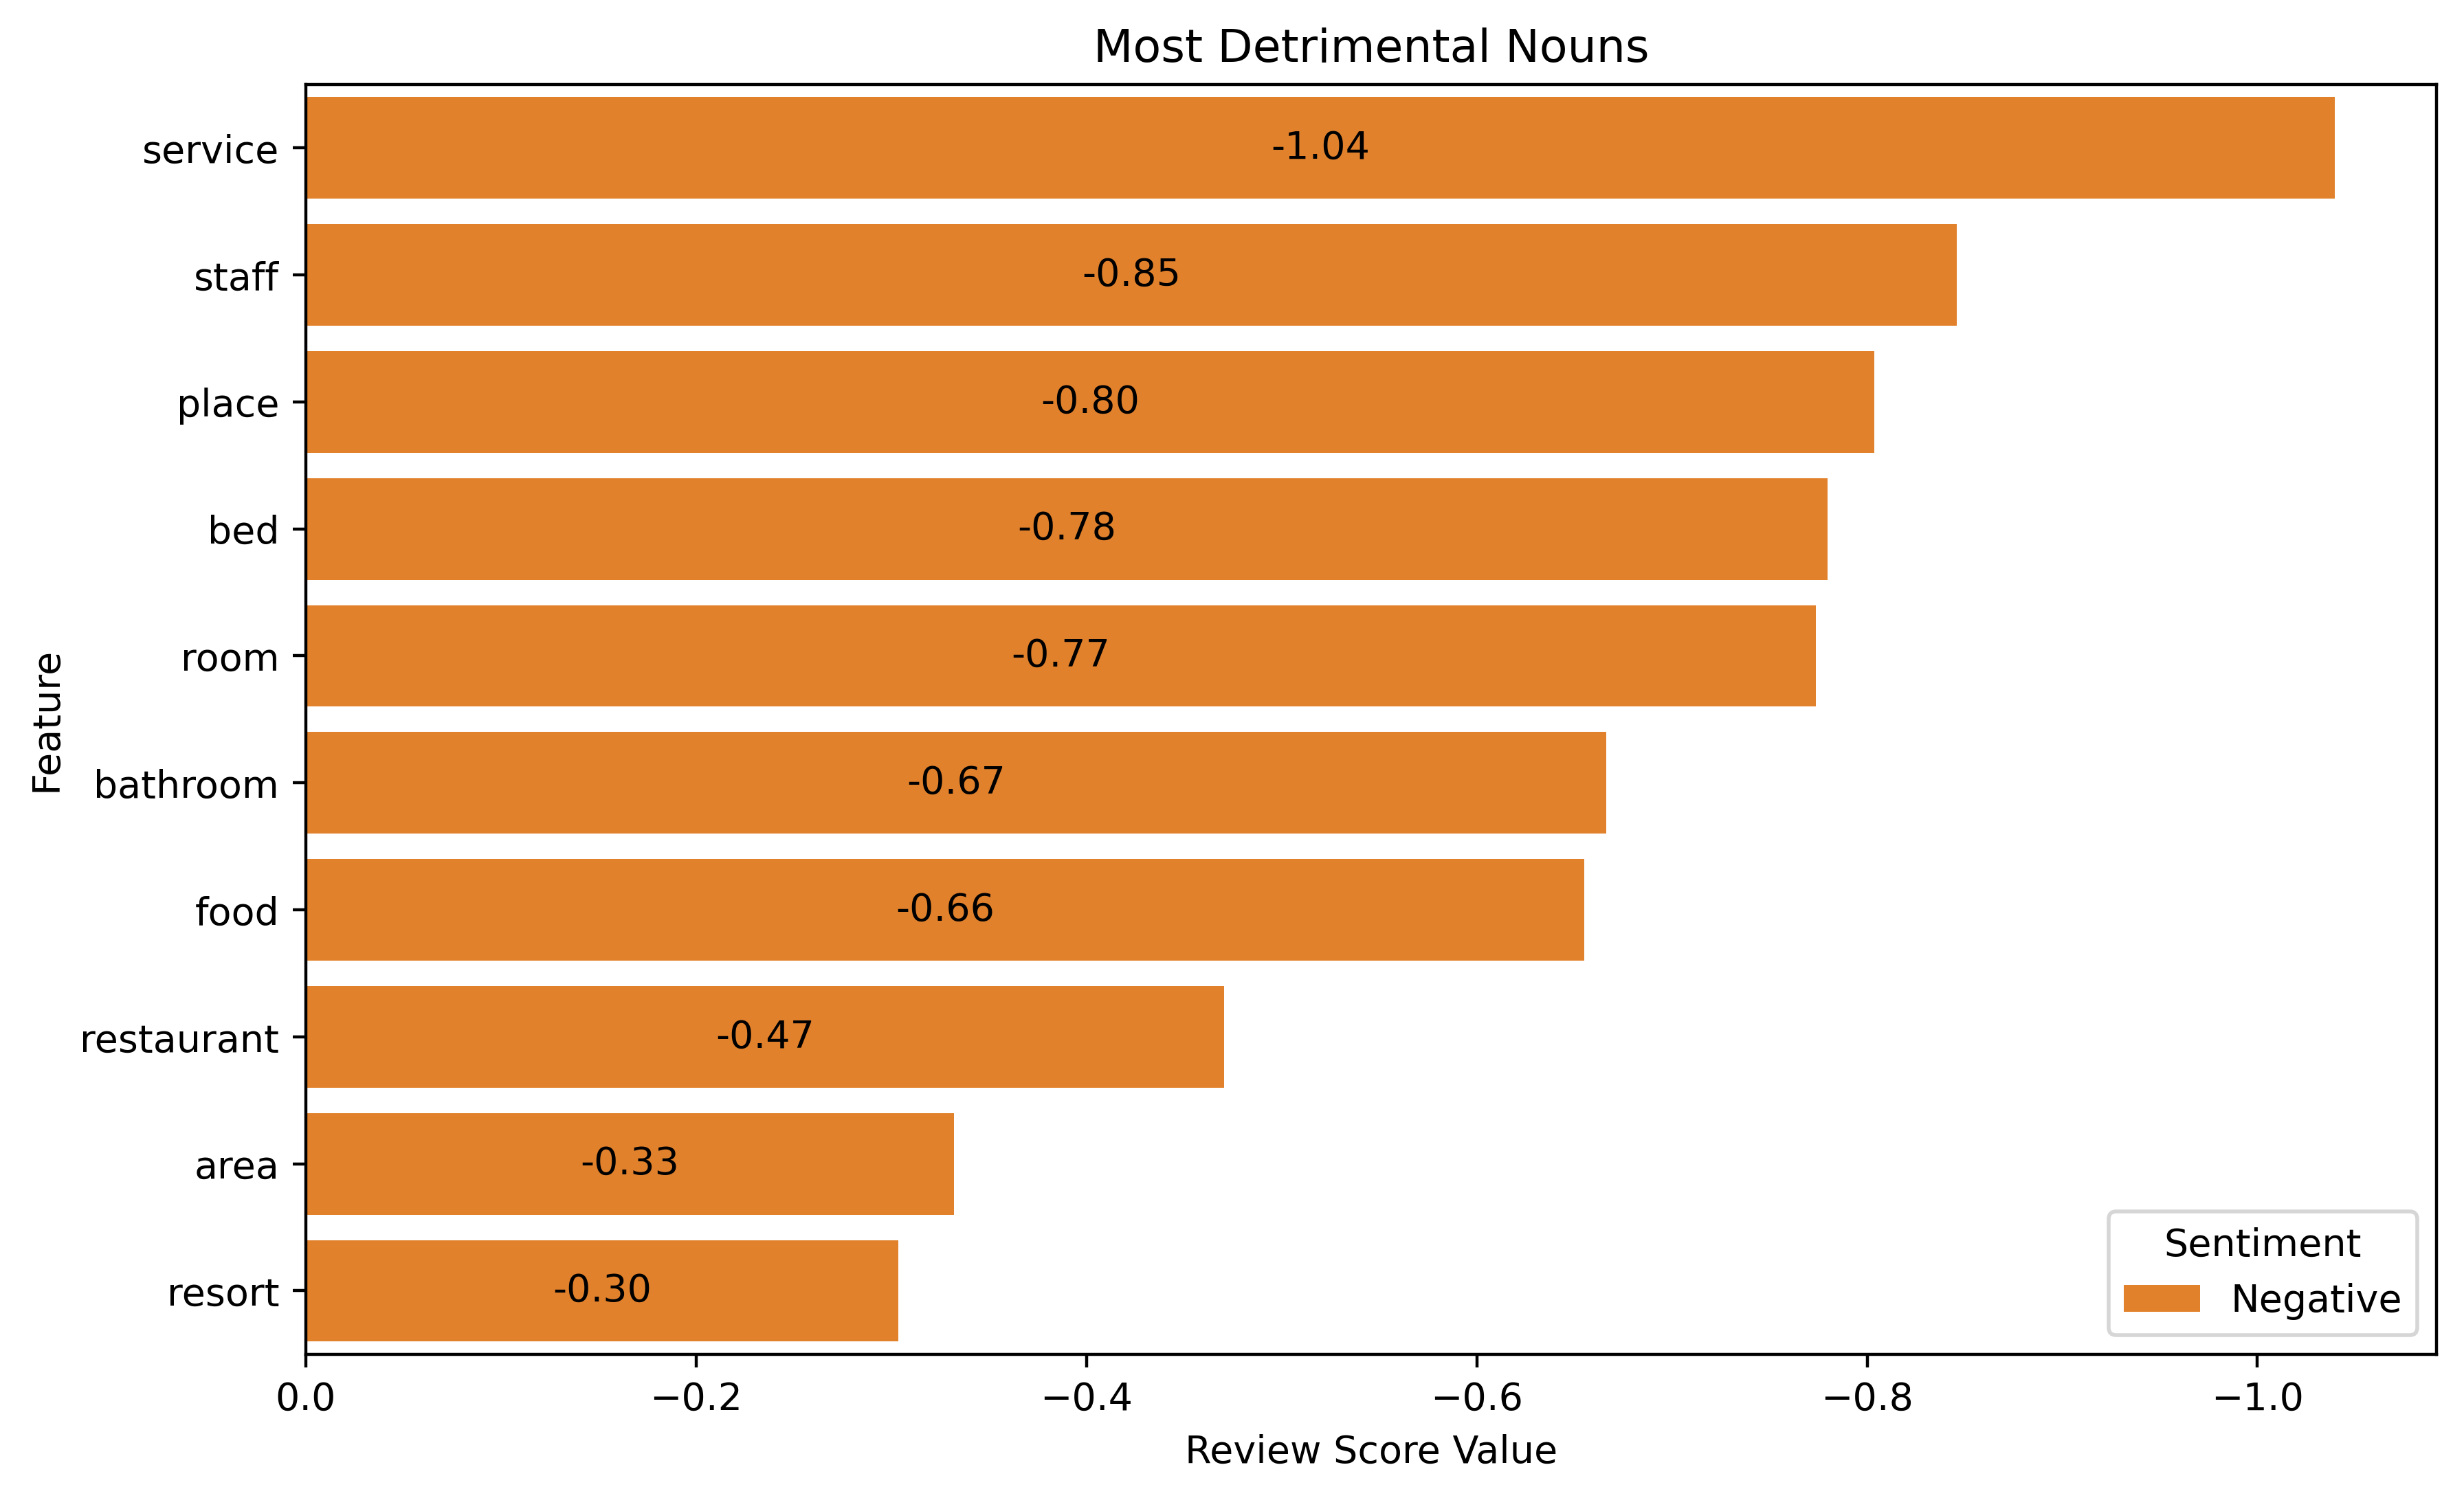

In [35]:
plt.figure(figsize=(10, 6), dpi=400)

ax = sns.barplot(data=df_features.tail(10).iloc[::-1], x='Value', y='Feature', hue='Sentiment', palette=sns.color_palette()[1:2], dodge=False)
plt.gca().invert_xaxis()

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='center')

plt.title('Most Detrimental Nouns')
plt.xlabel('Review Score Value')

plt.show()